In [1]:
import control
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

## Original System

In [4]:
s = control.tf([1, 0], [0, 1])

In [5]:
G = 1/((s+2)*s)
G

TransferFunction(array([1]), array([1, 2, 0]))

Type 1 system: $G(s) = \dfrac{1}{s(s+2)}$

### Requirements

* 0 steady state error to unit ramp response (PI)
* damping ratio of sqrt(2)/2  (PD)
* settling time of 2 seconds  (PD)

$t_s = 4/ \sigma$

$\sigma = 4/ t_s = 2$

$\cos(\theta) = \zeta$

$\cos(\theta) = \zeta$

$\theta = \arccos(\zeta)$


In [13]:
np.arccos(np.sqrt(2)/2)*180/np.pi

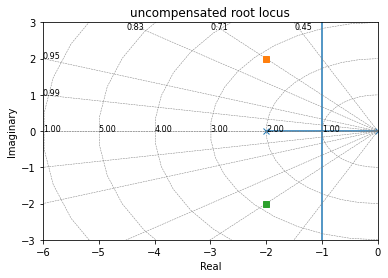

In [14]:
control.rlocus(G, xlim=[-6, 0], ylim=[-3, 3]);
plt.title('uncompensated root locus')
sd = -2 + 2j

plt.plot(np.real(sd), np.imag(sd), 's')
plt.plot(np.real(sd), -np.imag(sd), 's')

1 states have been removed from the model


Text(0.5, 1.0, 'uncompensated unit ramp response error')

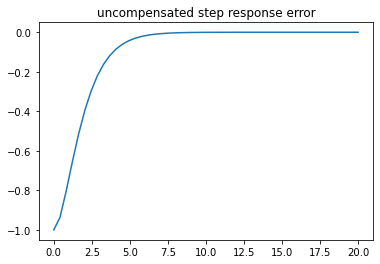

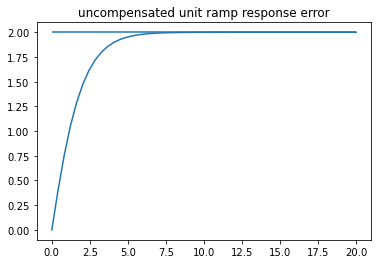

In [15]:
Gc = G/(1+G)
t, y = control.step_response(Gc, T=np.linspace(0, 20));
plt.plot(t, y - 1, label='y')
#plt.hlines(1, 0, 20, label='u')
plt.title('uncompensated step response error')

Kv = np.real((control.minreal(s*G).horner(0))[0, 0])
Kv

plt.figure()
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t-y, label='e')
plt.hlines(1/Kv, 0, 20)
plt.title('uncompensated unit ramp response error')

## PID Compensator


* Do PD first

$H_{PD} = K (s + z)$

$G H_{PD} = -1$

$\angle{(G H_{PD})} = 180 deg$

$|G*H_{PD}| = 1$

$ K = 1/ | G(s_d) (s_d + 4) | $

In [31]:
np.angle(G(sd))*180/np.pi

In [35]:
K = 1/ np.abs(G(sd)*(sd + 4))
K

In [36]:
H_PD = 2*(s + 4)

Text(0.5, 1.0, 'PD compensated root locus')

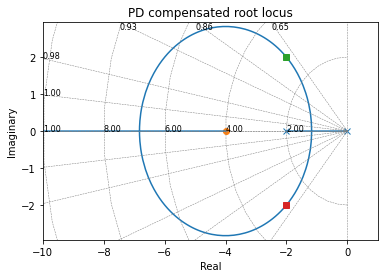

In [37]:
control.rlocus(G*H_PD, xlim=[-10, 1]);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')
plt.title('PD compensated root locus')

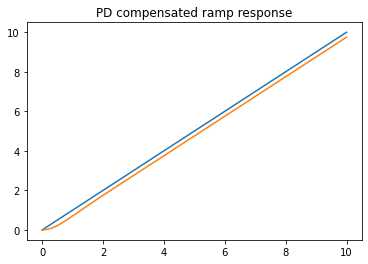

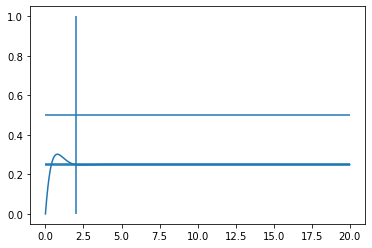

In [49]:
Gc_PD = G*H_PD/(1+G*H_PD)
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 10, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('PD compensated ramp response')

plt.figure()
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 20, 1000));
plt.plot(t, t-y)
plt.hlines([0.25*1.02, 0.25*0.98], 0, t[-1])
plt.vlines(2, 0, 1)
plt.hlines(0.5, 0, 20)

$ e_{ss}(t) = \lim\limits_{s \rightarrow 0} s E(s)$

In [50]:
E_R = 1/(1 + G*H_PD)
E_R

TransferFunction(array([1, 2, 0]), array([1, 4, 8]))

In [51]:
R = 1/s**2
control.minreal(s*E_R*R)

2 states have been removed from the model


TransferFunction(array([1., 2.]), array([1., 4., 8.]))

## PI Compensator

$ H_{PI} = K_{PI} \dfrac{(s + z)}{s}$

We will tell you the where to put the zero.

In [121]:
z_PI = 0.01

To find K to satisfy magnitude after small change from PI.
Find change due to |H_PI(s_d)|

In [125]:
K_PI = 1/abs(((sd + z_PI)/sd))
K_PI

In [126]:
H_PI = K_PI*(s+z)/s
abs(H_PI(sd))

$ | G(s+d)  K_{PI} (s + z_{PI})/s  K_{PD}  (s + z_{PD})| = 1$

In [127]:
H_PI = K_PI*(s+z)/s
H_PID = H_PI*H_PD 
H_PID

TransferFunction(array([2.00500623, 8.040075  , 0.08020025]), array([1, 0]))

Find: 

K_P = 8.04, K_I = 0.0802, K_D = 2.005

Don't have to worry about change in angle condition due to PI for exam.

In [128]:
np.angle((G*H_PID)(sd))*180/np.pi

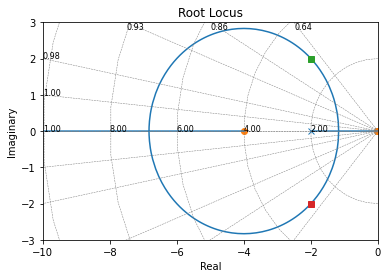

In [129]:
control.rlocus(G*H,xlim=[-10, 0], ylim=[-3, 3]);
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')

In [130]:
control.minreal(G*H_PD*s).horner(0)

1 states have been removed from the model


array([[[4.+0.j]]])

In [131]:
control.minreal(G*H*s).horner(0)

1 states have been removed from the model


/home/jgoppert/anaconda3/envs/research/lib/python3.8/site-packages/control/xferfcn.py:386: RuntimeWarning: divide by zero encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
/home/jgoppert/anaconda3/envs/research/lib/python3.8/site-packages/control/xferfcn.py:386: RuntimeWarning: invalid value encountered in true_divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /


array([[[inf+nanj]]])

Text(0.5, 1.0, 'PID compensated ramp response error')

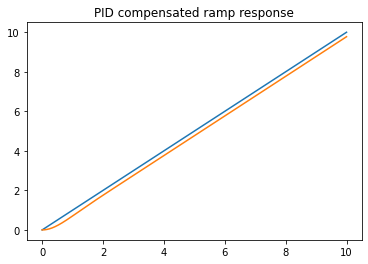

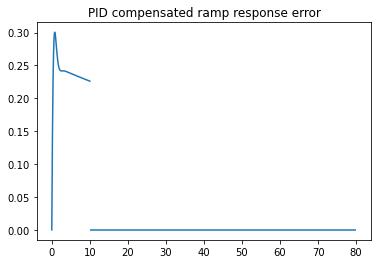

In [132]:
Gc_PID = G*H/(1+G*H)
t, y = control.step_response(Gc_PID/s, T=np.linspace(0, 10, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('PID compensated ramp response')

plt.figure()
plt.plot(t, t - y)
plt.hlines(t[0], t[-1], 80)
plt.title('PID compensated ramp response error')